# Retail Giant Sales Forecasting Assignment

### Problem Statement

Global Mart is an online supergiant store that has worldwide operations. This store takes orders and delivers across the globe 
and deals with all the major product categories — consumer, corporate & home office. As a sales manager for this store, you 
have to forecast the sales of the products for the next 6 months, so that you have a proper estimate and can plan your inventory
and business processes accordingly.

In [1]:
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime

%matplotlib inline

# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read the dataset from local path
retail = pd.read_csv("C:\Software\Data\Gaurav Certificates\PGD - Data Science Notes\Machine Learning\Retail Giant Sales Forecasting Assignment/Global+Superstore+Data.csv")
retail.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [3]:
#Checking details of the dataframe
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
Order Date    51290 non-null object
Segment       51290 non-null object
Market        51290 non-null object
Sales         51290 non-null float64
Profit        51290 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [4]:
#determine the shape of the dataframe (no of rows*no of columns)
retail.shape

(51290, 5)

In [5]:
#get the statistical description of the data
retail.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


In [6]:
#get all the columns of the dataframe
retail.columns

Index(['Order Date', 'Segment', 'Market', 'Sales', 'Profit'], dtype='object')

In [7]:
# check for NULL Values
round(100*(retail.isnull().sum()/len(retail.index)), 2)

Order Date    0.0
Segment       0.0
Market        0.0
Sales         0.0
Profit        0.0
dtype: float64

In [8]:
#Checking distinct values for Segment column
retail['Segment'].value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

In [9]:
#Converting Order Date into Date time format
#retail['Order Date'] = pd.to_datetime(retail['Order Date'], format='%d-%m-%Y')

In [10]:
retail.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [11]:
#Checking data type again
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
Order Date    51290 non-null object
Segment       51290 non-null object
Market        51290 non-null object
Sales         51290 non-null float64
Profit        51290 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [12]:
#Creating OrderMonthYear column from Order Date
retail['OrderMonthYear'] = pd.to_datetime(retail['Order Date']).dt.to_period('m')
retail.head()

# retail['OrderMonthYear'] = retail['Order Date'].dt.strftime('%m-%Y')

,Order Date,Segment,Market,Sales,Profit,OrderMonthYear
0,31-07-2012,Consumer,US,2309.650,762.1845,2012-07
1,05-02-2013,Corporate,APAC,3709.395,-288.7650,2013-05
2,17-10-2013,Consumer,APAC,5175.171,919.9710,2013-10
3,28-01-2013,Home Office,EU,2892.510,-96.5400,2013-01
4,05-11-2013,Consumer,Africa,2832.960,311.5200,2013-05


In [13]:
#Creating column Market Segment
retail["Market Segment"] = retail['Market'] + '_' + retail['Segment']
retail.head()

,Order Date,Segment,Market,Sales,Profit,OrderMonthYear,Market Segment
0,31-07-2012,Consumer,US,2309.650,762.1845,2012-07,US_Consumer
1,05-02-2013,Corporate,APAC,3709.395,-288.7650,2013-05,APAC_Corporate
2,17-10-2013,Consumer,APAC,5175.171,919.9710,2013-10,APAC_Consumer
3,28-01-2013,Home Office,EU,2892.510,-96.5400,2013-01,EU_Home Office
4,05-11-2013,Consumer,Africa,2832.960,311.5200,2013-05,Africa_Consumer


In [14]:
retail.head

<bound method NDFrame.head of        Order Date      Segment  Market     Sales    Profit OrderMonthYear  \
0      31-07-2012     Consumer      US  2309.650  762.1845        2012-07   
1      05-02-2013    Corporate    APAC  3709.395 -288.7650        2013-05   
2      17-10-2013     Consumer    APAC  5175.171  919.9710        2013-10   
3      28-01-2013  Home Office      EU  2892.510  -96.5400        2013-01   
4      05-11-2013     Consumer  Africa  2832.960  311.5200        2013-05   
...           ...          ...     ...       ...       ...            ...   
51285  19-06-2014    Corporate    APAC    65.100    4.5000        2014-06   
51286  20-06-2014     Consumer      US     0.444   -1.1100        2014-06   
51287  02-12-2013  Home Office      US    22.920   11.2308        2013-02   
51288  18-02-2012  Home Office   LATAM    13.440    2.4000        2012-02   
51289  22-05-2012     Consumer   LATAM    61.380    1.8000        2012-05   

          Market Segment  
0            US_Co

In [15]:
#Checking unique count of Market Segments
len(retail['Market Segment'].unique())

21

In [16]:
retail.groupby(by='Market Segment').sum()

,Sales,Profit
Market Segment,,
APAC_Consumer,1.816754e+06,222817.56040
APAC_Corporate,1.078466e+06,129737.23480
APAC_Home Office,6.905241e+05,83445.25380
Africa_Consumer,4.237668e+05,47772.09900
Africa_Corporate,2.049390e+05,20686.96500
Africa_Home Office,1.550674e+05,20412.56700
Canada_Consumer,3.571911e+04,9677.70000
Canada_Corporate,1.931373e+04,5036.46000
Canada_Home Office,1.189533e+04,3103.23000


In [17]:
COV_cal = retail.pivot_table(index='OrderMonthYear', values='Profit', columns='Market Segment', aggfunc='sum')
COV_cal.head()

Market Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
OrderMonthYear,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


In [18]:
from sklearn.model_selection import train_test_split

train_len = 42
train = COV_cal[0:train_len] # first 42 months as training set
test = COV_cal[train_len:] # last 6 months as out-of-time test set

In [19]:
train.shape

(42, 21)

In [20]:
np.std(train)/train.mean()

Market Segment
APAC_Consumer         0.522725
APAC_Corporate        0.530051
APAC_Home Office      1.008219
Africa_Consumer       1.310351
Africa_Corporate      1.891744
Africa_Home Office    2.012937
Canada_Consumer       1.250315
Canada_Corporate      1.786025
Canada_Home Office    2.369695
EMEA_Consumer         2.652495
EMEA_Corporate        6.355024
EMEA_Home Office      7.732073
EU_Consumer           0.595215
EU_Corporate          0.722076
EU_Home Office        0.938072
LATAM_Consumer        0.683770
LATAM_Corporate       0.882177
LATAM_Home Office     1.169693
US_Consumer           1.010530
US_Corporate          1.071829
US_Home Office        1.124030
dtype: float64

In [21]:
retail.head()

,Order Date,Segment,Market,Sales,Profit,OrderMonthYear,Market Segment
0,31-07-2012,Consumer,US,2309.650,762.1845,2012-07,US_Consumer
1,05-02-2013,Corporate,APAC,3709.395,-288.7650,2013-05,APAC_Corporate
2,17-10-2013,Consumer,APAC,5175.171,919.9710,2013-10,APAC_Consumer
3,28-01-2013,Home Office,EU,2892.510,-96.5400,2013-01,EU_Home Office
4,05-11-2013,Consumer,Africa,2832.960,311.5200,2013-05,Africa_Consumer


In [22]:
retail_data = retail[retail['Market Segment']=='APAC_Consumer']
retail_data.head()

,Order Date,Segment,Market,Sales,Profit,OrderMonthYear,Market Segment
2,17-10-2013,Consumer,APAC,5175.171,919.971,2013-10,APAC_Consumer
6,07-11-2011,Consumer,APAC,1822.080,564.840,2011-07,APAC_Consumer
7,14-04-2012,Consumer,APAC,5244.840,996.480,2012-04,APAC_Consumer
14,06-06-2013,Consumer,APAC,3701.520,1036.080,2013-06,APAC_Consumer
29,25-02-2012,Consumer,APAC,1878.720,582.360,2012-02,APAC_Consumer


In [23]:
retail_data = retail_data.drop(columns=['Segment','Market','Market Segment','Profit'])
retail_data.head()

,Order Date,Sales,OrderMonthYear
2,17-10-2013,5175.171,2013-10
6,07-11-2011,1822.080,2011-07
7,14-04-2012,5244.840,2012-04
14,06-06-2013,3701.520,2013-06
29,25-02-2012,1878.720,2012-02


In [24]:
#Grouping dataframe with respect to OrderMonthYear
retail_data = pd.DataFrame(retail_data.groupby('OrderMonthYear').Sales.sum())
retail_data.head()

,Sales
OrderMonthYear,
2011-01,18821.9898
2011-02,23313.3531
2011-03,26518.4919
2011-04,12046.0923
2011-05,25941.9000


In [25]:
retail_data = retail_data.reset_index()
retail_data.head()

,OrderMonthYear,Sales
0,2011-01,18821.9898
1,2011-02,23313.3531
2,2011-03,26518.4919
3,2011-04,12046.0923
4,2011-05,25941.9000


In [26]:
#Converting datetime into timestamp format
retail_data['Order Date'] = retail_data['OrderMonthYear'].apply(lambda x : x.to_timestamp())
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
OrderMonthYear    48 non-null period[M]
Sales             48 non-null float64
Order Date        48 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), period[M](1)
memory usage: 1.2 KB


In [27]:
retail_data.head()

,OrderMonthYear,Sales,Order Date
0,2011-01,18821.9898,2011-01-01
1,2011-02,23313.3531,2011-02-01
2,2011-03,26518.4919,2011-03-01
3,2011-04,12046.0923,2011-04-01
4,2011-05,25941.9000,2011-05-01


In [28]:
#Dropping OrderMonthYear column
retail_data.drop(columns = ['OrderMonthYear'],inplace = True)
retail_data.head()

,Sales,Order Date
0,18821.9898,2011-01-01
1,23313.3531,2011-02-01
2,26518.4919,2011-03-01
3,12046.0923,2011-04-01
4,25941.9000,2011-05-01


In [29]:
#Setting index as 'Order Date'
retail_data.set_index('Order Date',inplace = True)
retail_data.head()

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


In [30]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2011-01-01 to 2014-12-01
Data columns (total 1 columns):
Sales    48 non-null float64
dtypes: float64(1)
memory usage: 768.0 bytes


## Outlier detection
-Box plot and interquartile range

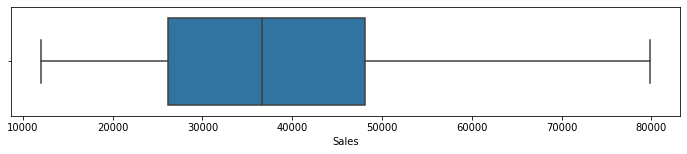

In [31]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=retail_data['Sales'],whis=1.5)

### Histogram plot

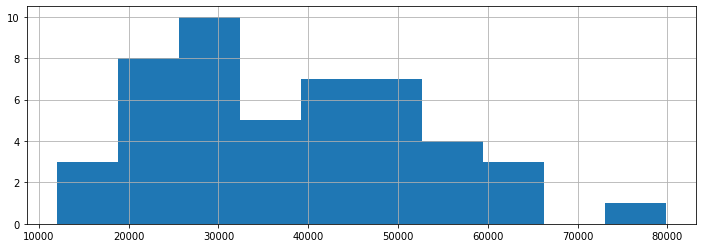

In [32]:
fig = retail_data.Sales.hist(figsize = (12,4))

## Time series Decomposition

### Additive seasonal decomposition

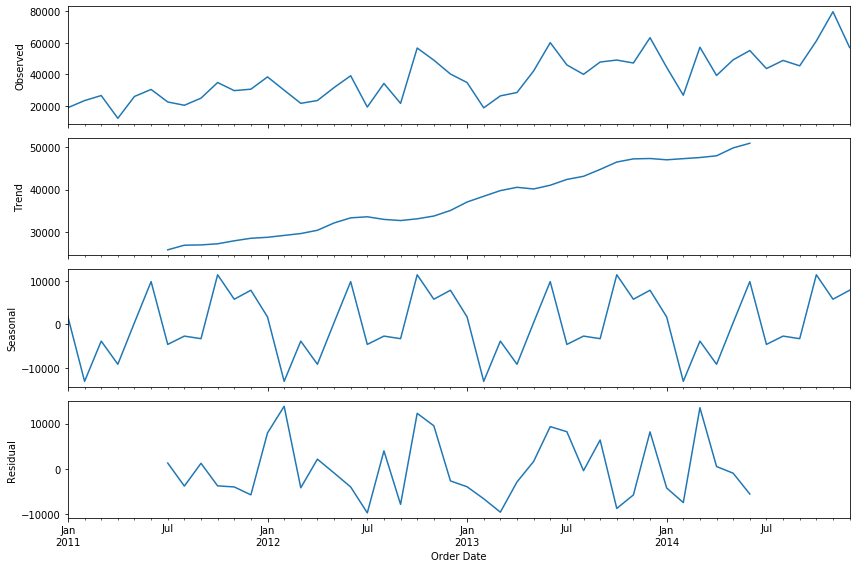

In [33]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(retail_data.Sales, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

### Multiplicative seasonal decomposition

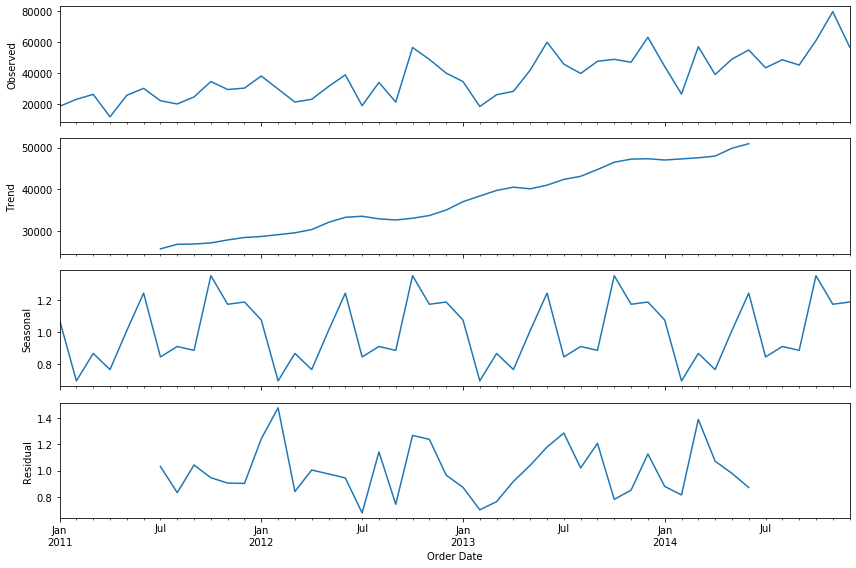

In [34]:
decomposition = sm.tsa.seasonal_decompose(retail_data.Sales, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

# Build and evaluate time series forecast

## Split time series data into training and test set

In [35]:
train_len = 42
train = retail_data[0:train_len] # first 120 months as training set
test = retail_data[train_len:] # last 24 months as out-of-time test set

# Simple time series methods

## Naive method

In [36]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Sales'][train_len-1]

### Plot train, test and forecast

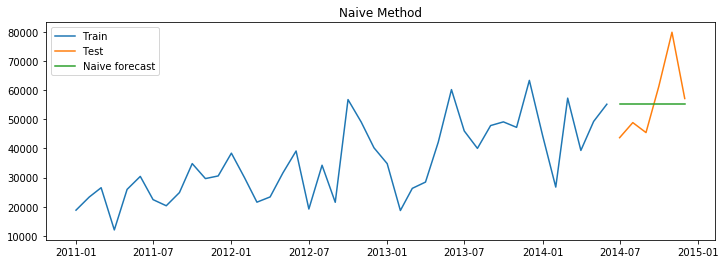

In [37]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

### Calculate MAPE

In [38]:
from sklearn.metrics import mean_squared_error

mape = np.round(np.mean(np.abs(test['Sales']-y_hat_naive['naive_forecast'])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape]})
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,17.47


## Simple average method

In [39]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Sales'].mean()

### Plot train, test and forecast

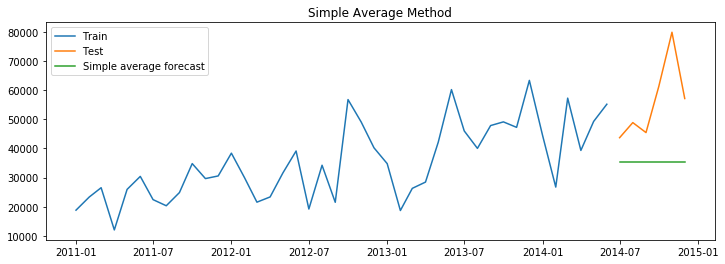

In [40]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

### Calculate MAPE

In [41]:
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_avg['avg_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,17.47
0,Simple average method,34.34


## Simple moving average method

In [42]:
y_hat_sma = retail_data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = retail_data['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

### Plot train, test and forecast

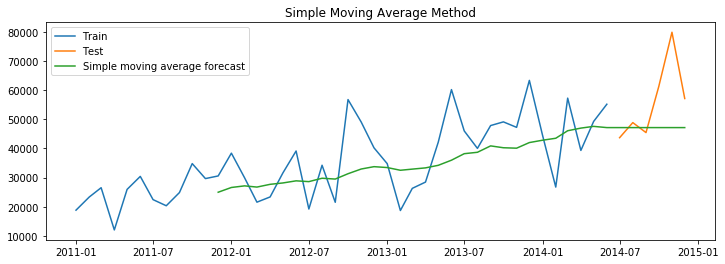

In [43]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

### Calculate MAPE

In [44]:

mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sma['sma_forecast'][train_len:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,17.47
0,Simple average method,34.34
0,Simple moving average forecast,16.10


# Exponential smoothing methods

## Simple exponential smoothing

In [45]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

### Plot train, test and forecast

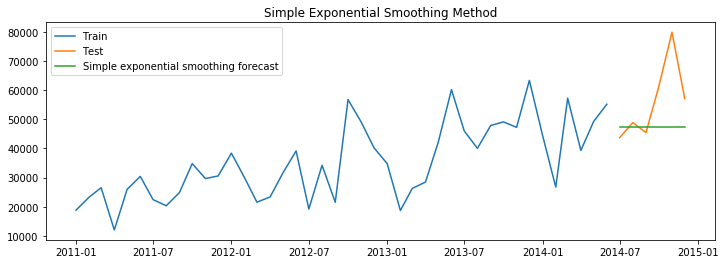

In [46]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

### Calculate MAPE

In [47]:
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,MAPE
0,Naive method,17.47
0,Simple average method,34.34
0,Simple moving average forecast,16.10
0,Simple exponential smoothing forecast,15.99


## Holt's method with trend

In [48]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 18821.989799999996, 'initial_slope': 4491.3633000000045, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

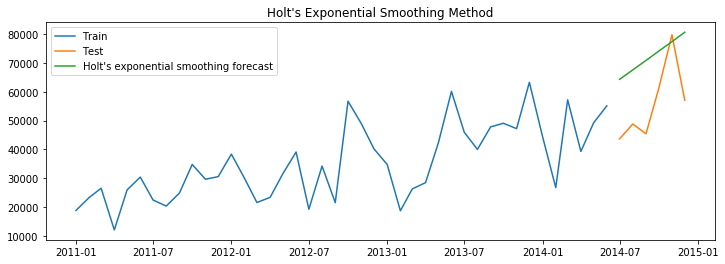

In [49]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

### Calculate MAPE

In [50]:
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,17.47
0,Simple average method,34.34
0,Simple moving average forecast,16.10
0,Simple exponential smoothing forecast,15.99
0,Holt's exponential smoothing method,34.57


## Holt Winters' additive method with trend and seasonality

In [51]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.0020374886703564874, 'smoothing_slope': 0.0020374868438797038, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 29676.666994239353, 'initial_slope': 723.317636007915, 'initial_seasons': array([ -9378.87329099, -19734.27615341, -12187.76564172, -19978.47396353,
        -9315.9790386 ,  -1060.75172544, -14280.27499763, -12958.46182918,
       -13443.04599114,    963.6376487 ,  -4636.67766042,  -2722.90140336]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

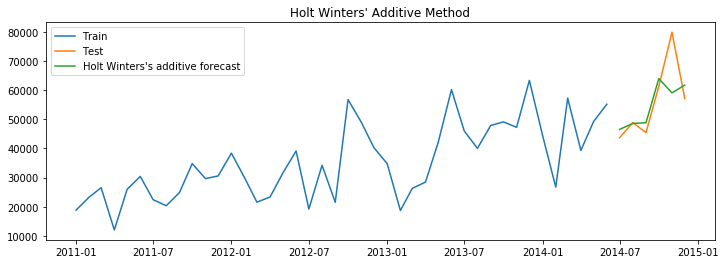

In [52]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

### Calculate MAPE

In [53]:
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,17.47
0,Simple average method,34.34
0,Simple moving average forecast,16.10
0,Simple exponential smoothing forecast,15.99
0,Holt's exponential smoothing method,34.57
0,Holt Winters' additive method,8.84


## Holt Winter's multiplicative method with trend and seasonality

In [54]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 9.693028733848621e-09, 'smoothing_slope': 9.123559401830165e-09, 'smoothing_seasonal': 2.9299671943913878e-08, 'damping_slope': nan, 'initial_level': 34110.96530161187, 'initial_slope': 730.4170382646302, 'initial_seasons': array([0.71585886, 0.4862027 , 0.68202326, 0.53148784, 0.73796969,
       0.90144356, 0.6247045 , 0.6570469 , 0.64896112, 0.93178148,
       0.82775312, 0.88438021]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

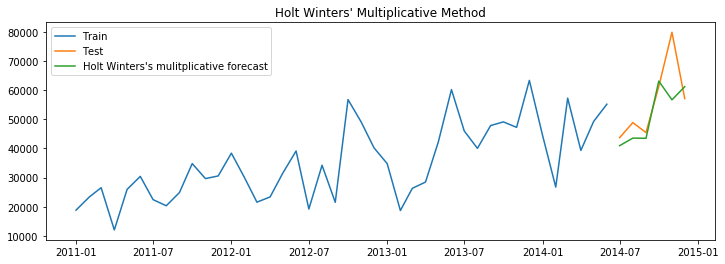

In [55]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Multiplicative Method')
plt.show()

### Calculate MAPE

In [56]:
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,17.47
0,Simple average method,34.34
0,Simple moving average forecast,16.10
0,Simple exponential smoothing forecast,15.99
0,Holt's exponential smoothing method,34.57
0,Holt Winters' additive method,8.84
0,Holt Winters' multiplicative method,10.12


### Augmented Dickey-Fuller (ADF) test

In [57]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(retail_data['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.376024
Critical Values @ 0.05: -2.93
p-value: 0.011804


### Box Cox transformation to make variance constant

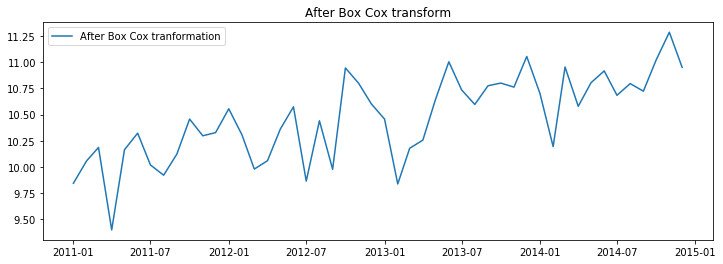

In [58]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(retail_data['Sales'], lmbda=0), index = retail_data.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

### Differencing to remove trend

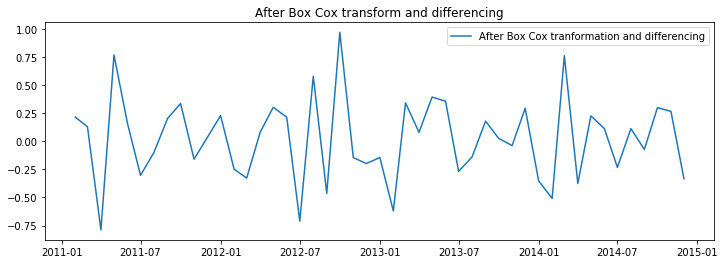

In [59]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), retail_data.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [60]:
data_boxcox_diff.dropna(inplace=True)

In [61]:
data_boxcox_diff.tail()

Order Date
2014-08-01    0.112012
2014-09-01   -0.072673
2014-10-01    0.298459
2014-11-01    0.265449
2014-12-01   -0.335151
dtype: float64

### Augmented Dickey-Fuller (ADF) test

In [62]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -4.535011
Critical Values @ 0.05: -2.95
p-value: 0.000170


In [63]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [64]:
train_data_boxcox_diff

Order Date
2011-02-01    0.214000
2011-03-01    0.128816
2011-04-01   -0.789102
2011-05-01    0.767119
2011-06-01    0.158548
2011-07-01   -0.303937
2011-08-01   -0.098320
2011-09-01    0.201126
2011-10-01    0.335976
2011-11-01   -0.159845
2011-12-01    0.030117
2012-01-01    0.227734
2012-02-01   -0.248683
2012-03-01   -0.327663
2012-04-01    0.079944
2012-05-01    0.301872
2012-06-01    0.213622
2012-07-01   -0.710884
2012-08-01    0.577494
2012-09-01   -0.463894
2012-10-01    0.969434
2012-11-01   -0.146063
2012-12-01   -0.198531
2013-01-01   -0.144942
2013-02-01   -0.620558
2013-03-01    0.341112
2013-04-01    0.078691
2013-05-01    0.392955
2013-06-01    0.355907
2013-07-01   -0.268628
2013-08-01   -0.139388
2013-09-01    0.178702
2013-10-01    0.026014
2013-11-01   -0.038982
2013-12-01    0.293485
2014-01-01   -0.353341
2014-02-01   -0.508883
2014-03-01    0.761118
2014-04-01   -0.375717
2014-05-01    0.225410
2014-06-01    0.113222
dtype: float64

## Auto regression method (AR)

In [65]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.024255
ar.L1.y   -0.406729
dtype: float64


### Recover original time series

In [66]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

### Plot train, test and forecast

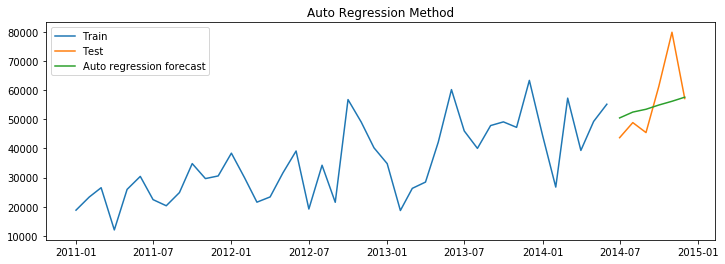

In [67]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

### Calculate MAPE

In [68]:
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,17.47
0,Simple average method,34.34
0,Simple moving average forecast,16.10
0,Simple exponential smoothing forecast,15.99
0,Holt's exponential smoothing method,34.57
0,Holt Winters' additive method,8.84
0,Holt Winters' multiplicative method,10.12
0,Autoregressive (AR) method,13.56


## Moving average method (MA)

In [69]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.021415
ma.L1.y   -1.000000
dtype: float64


### Recover original time series

In [70]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

### Plot train, test and forecast

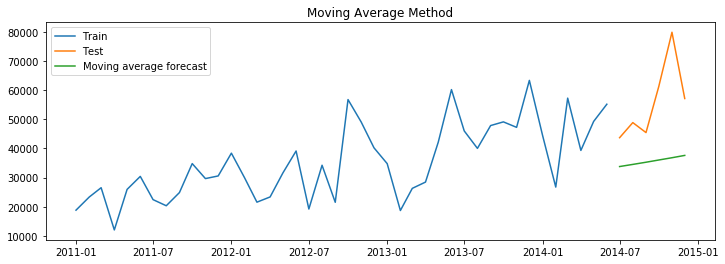

In [71]:
plt.figure(figsize=(12,4))
plt.plot(retail_data['Sales'][:train_len], label='Train')
plt.plot(retail_data['Sales'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

### Calculate MAPE

In [72]:
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,17.47
0,Simple average method,34.34
0,Simple moving average forecast,16.10
0,Simple exponential smoothing forecast,15.99
0,Holt's exponential smoothing method,34.57
0,Holt Winters' additive method,8.84
0,Holt Winters' multiplicative method,10.12
0,Autoregressive (AR) method,13.56
0,Moving Average (MA) method,33.93


## Auto regression moving average method (ARMA)

In [73]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.02147
ar.L1.y    0.07458
ma.L1.y   -1.00000
dtype: float64


### Recover original time series

In [74]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

### Plot train, test and forecast

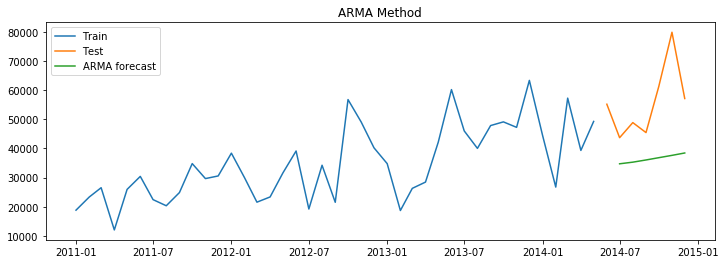

In [75]:
plt.figure(figsize=(12,4))
plt.plot(retail_data['Sales'][:train_len-1], label='Train')
plt.plot(retail_data['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

### Calculate MAPE

In [76]:
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,17.47
0,Simple average method,34.34
0,Simple moving average forecast,16.10
0,Simple exponential smoothing forecast,15.99
0,Holt's exponential smoothing method,34.57
0,Holt Winters' additive method,8.84
0,Holt Winters' multiplicative method,10.12
0,Autoregressive (AR) method,13.56
0,Moving Average (MA) method,33.93
0,Autoregressive moving average (ARMA) method,32.40


## Auto regressive integrated moving average (ARIMA)

In [77]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

const        0.02147
ar.L1.D.y    0.07458
ma.L1.D.y   -1.00000
dtype: float64


### Recover original time series forecast

In [78]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

### Plot train, test and forecast

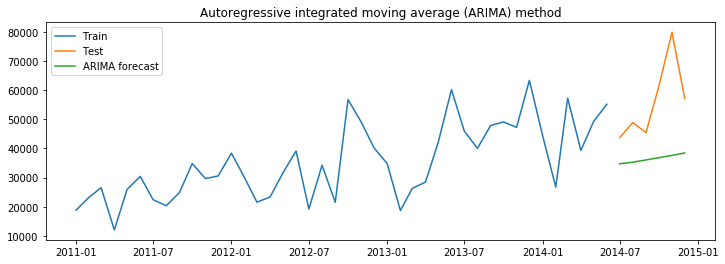

In [79]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

### Calculate MAPE

In [80]:
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,17.47
0,Simple average method,34.34
0,Simple moving average forecast,16.10
0,Simple exponential smoothing forecast,15.99
0,Holt's exponential smoothing method,34.57
0,Holt Winters' additive method,8.84
0,Holt Winters' multiplicative method,10.12
0,Autoregressive (AR) method,13.56
0,Moving Average (MA) method,33.93
0,Autoregressive moving average (ARMA) method,32.40


## Seasonal auto regressive integrated moving average (SARIMA)

In [81]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.039152
ma.L1      -0.997877
ar.S.L12   -0.485107
sigma2      0.081978
dtype: float64


### Recover original time series forecast

In [82]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

### Plot train, test and forecast

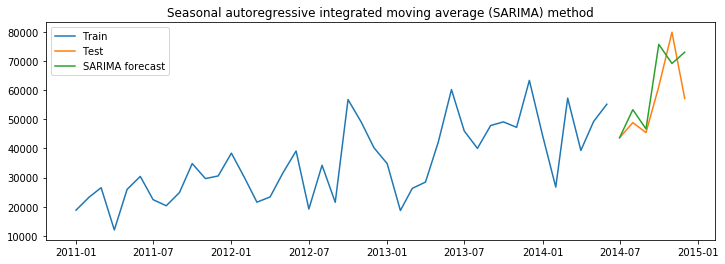

In [83]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

### Calculate MAPE

In [84]:
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,17.47
0,Simple average method,34.34
0,Simple moving average forecast,16.10
0,Simple exponential smoothing forecast,15.99
0,Holt's exponential smoothing method,34.57
0,Holt Winters' additive method,8.84
0,Holt Winters' multiplicative method,10.12
0,Autoregressive (AR) method,13.56
0,Moving Average (MA) method,33.93
0,Autoregressive moving average (ARMA) method,32.40


### As per all the above models the Best Fit Models are "Holt Winters' additive method" followed by "Holt Winters' multiplicative method" and "SARIMA" . These 03 Models have lowest MAPE Value

# End of the Assignment